In [100]:
import json
from collections import Counter
import pandas as pd
import matplotlib.colors as color

FIG_SIZE = (16/2, 10/2)
FONT_SIZE = 15
RARITY_PRIORITY = {
    'Varies': 'gray',
    'Common': 'black',
    'Uncommon': 'green',
    'Rare': 'lightblue',
    'Very-rare': 'purple',
    'Legendary': 'orange',
    'Artifact': 'brown'
}

RARITY_COLORS = list(RARITY_PRIORITY.values())

with open('items_clean.json', 'r') as item_file:
    items = json.loads(item_file.read())

data = []
for item_name, item_data in items.items():
    data.append(item_data)

main_df = pd.DataFrame(data)
ordered_df = main_df[['name', 'rarity', 'type', 'sub_type', 'attunement', 'notes', 'image']]
ordered_df['rarity'] = ordered_df['rarity'].str.capitalize()
ordered_df['rarity'] = pd.Categorical(ordered_df['rarity'], RARITY_PRIORITY.keys())

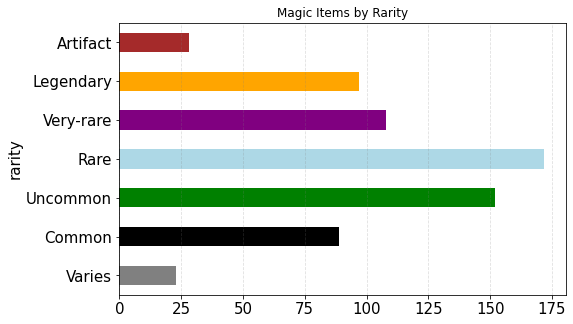

In [101]:
# Count Items by Rarity
rarity_df = ordered_df.groupby('rarity').size()

plot = rarity_df.plot.barh(color=RARITY_COLORS, legend=False, 
                           title='Magic Items by Rarity', 
                           figsize=FIG_SIZE, fontsize=FONT_SIZE)
plot.xaxis.label.set_fontsize(FONT_SIZE)
plot.yaxis.label.set_fontsize(FONT_SIZE)

x_labels = [item.capitalize() for item in RARITY_PRIORITY.keys()]
plot.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plot

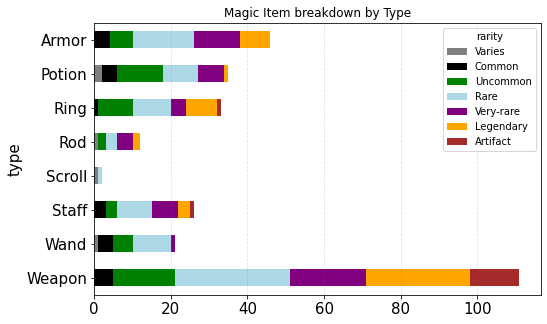

In [102]:
# Count items by Type (Not including Wondrous Items)
type_df = ordered_df.groupby(['type', 'rarity']).size().unstack().sort_index(ascending=False)
type_df = type_df.drop('Wondrous Item')

plot = type_df.plot.barh(stacked=True, color=RARITY_COLORS, 
                         figsize=FIG_SIZE, fontsize=FONT_SIZE,
                         title='Magic Item breakdown by Type')
plot.xaxis.label.set_fontsize(FONT_SIZE)
plot.yaxis.label.set_fontsize(FONT_SIZE)
plot.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plot

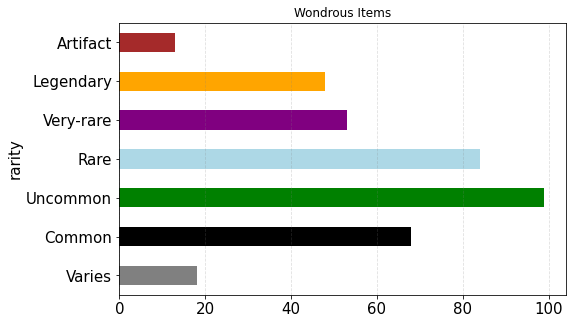

In [103]:
# Count items by Rarity for Wondrous Items
type_df = ordered_df.groupby(['type', 'rarity']).size().unstack()
type_df = type_df.loc['Wondrous Item']

plot = type_df.plot.barh(color=RARITY_COLORS, title='Wondrous Items', 
                         figsize=FIG_SIZE, fontsize=FONT_SIZE)
plot.xaxis.label.set_fontsize(FONT_SIZE)
plot.yaxis.label.set_fontsize(FONT_SIZE)
plot.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plot

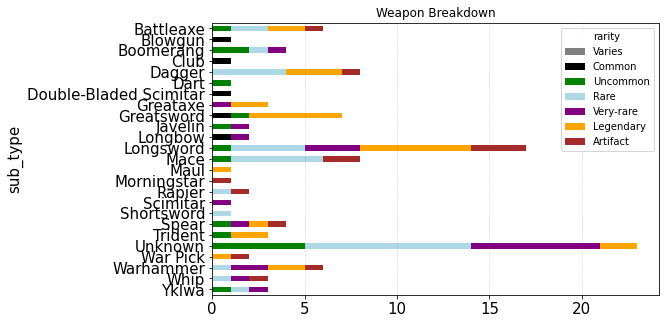

In [104]:
# Weapon Statistics
weapon_df = ordered_df[ordered_df['type'] == 'Weapon'] \
    .groupby(['sub_type', 'rarity'])['name'].size().unstack().sort_index(ascending=False)
plot = weapon_df.plot.barh(stacked=True, color=RARITY_COLORS, 
                           figsize=FIG_SIZE, fontsize=FONT_SIZE,
                           title='Weapon Breakdown')
plot.xaxis.label.set_fontsize(FONT_SIZE)
plot.yaxis.label.set_fontsize(FONT_SIZE)
plot.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plot

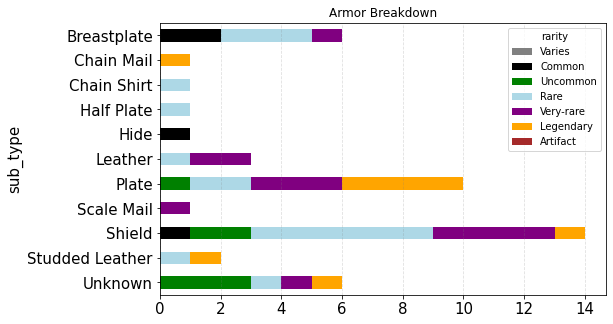

In [105]:
# Armor Statistics
weapon_df = ordered_df[ordered_df['type'] == 'Armor'] \
    .groupby(['sub_type', 'rarity'])['name'].size().unstack().sort_index(ascending=False)
plot = weapon_df.plot.barh(stacked=True, color=RARITY_COLORS, 
                           figsize=FIG_SIZE, fontsize=FONT_SIZE,
                           title='Armor Breakdown')
plot.xaxis.label.set_fontsize(FONT_SIZE)
plot.yaxis.label.set_fontsize(FONT_SIZE)
plot.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plot

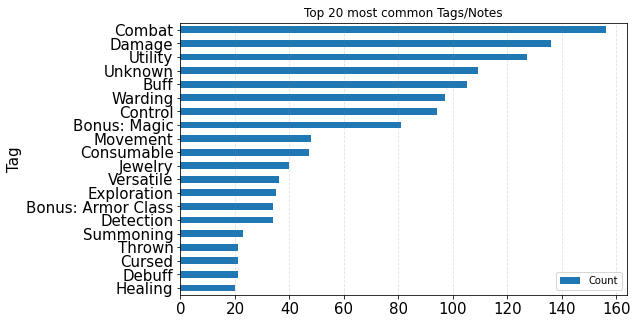

In [113]:
# Item Notes breakdown
all_notes = ordered_df['notes'].values.tolist()

unique_notes = set()
for item in all_notes:
    unique_notes.update(item)
unique_counter = Counter(unique_notes)

counter = Counter()
for array in all_notes:
    counter.update(array)
counter['Unknown'] = counter.pop('')

notes_df = pd.DataFrame(counter.most_common(20), columns=['Tag', 'Count'])
notes_df.set_index('Tag', inplace=True)
notes_df = notes_df.sort_values('Count')

plot = notes_df.plot.barh(color=color.TABLEAU_COLORS, 
                          figsize=FIG_SIZE, fontsize=FONT_SIZE,
                          title='Top 20 most common Tags/Notes')
plot.xaxis.label.set_fontsize(FONT_SIZE)
plot.yaxis.label.set_fontsize(FONT_SIZE)
plot.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

plot